## Forberedelse av data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Laster inn alle csv filene fra github
# Færder kommune
urla = "https://raw.githubusercontent.com/madhatter401/SOK-1005---Datavitenskap-for-konomer/refs/heads/main/arbeidskrav5/F%C3%A6rder/aldersfordeling-for-innb.csv"
urlb = "https://raw.githubusercontent.com/madhatter401/SOK-1005---Datavitenskap-for-konomer/refs/heads/main/arbeidskrav5/F%C3%A6rder/personer-med-innvandrerb.csv"
urlc = "https://raw.githubusercontent.com/madhatter401/SOK-1005---Datavitenskap-for-konomer/refs/heads/main/arbeidskrav5/F%C3%A6rder/hva-innbyggerne-jobber-m.csv"
urld = "https://raw.githubusercontent.com/madhatter401/SOK-1005---Datavitenskap-for-konomer/refs/heads/main/arbeidskrav5/F%C3%A6rder/hyeste-fullfrte-utdannin.csv"
urle = "https://raw.githubusercontent.com/madhatter401/SOK-1005---Datavitenskap-for-konomer/refs/heads/main/arbeidskrav5/F%C3%A6rder/hva-bruker-kommunen-kult.csv"
urlf = "https://raw.githubusercontent.com/madhatter401/SOK-1005---Datavitenskap-for-konomer/refs/heads/main/arbeidskrav5/F%C3%A6rder/utgifter-etter-utvalgte.csv"
urlg = "https://raw.githubusercontent.com/madhatter401/SOK-1005---Datavitenskap-for-konomer/refs/heads/main/arbeidskrav5/F%C3%A6rder/typer-av-biler-i-kommune.csv"

# Tromsø kommune
urltj = "https://raw.githubusercontent.com/madhatter401/SOK-1005---Datavitenskap-for-konomer/refs/heads/main/arbeidskrav5/Troms%C3%B8/hva-innbyggerne-jobber-m.csv"
urltu = "https://raw.githubusercontent.com/madhatter401/SOK-1005---Datavitenskap-for-konomer/refs/heads/main/arbeidskrav5/Troms%C3%B8/hyeste-fullfrte-utdannin.csv"
urlta = "https://raw.githubusercontent.com/madhatter401/SOK-1005---Datavitenskap-for-konomer/refs/heads/main/arbeidskrav5/Troms%C3%B8/aldersfordeling-for-innb.csv"


# Bruker pandas til å konvertere til dataframe
# Færder kommune
dfa = pd.read_csv(urla, sep=';')
dfb = pd.read_csv(urlb, sep=';')
dfc = pd.read_csv(urlc, sep=';')
dfd = pd.read_csv(urld, sep=';')
dfe = pd.read_csv(urle, sep=';')
dff = pd.read_csv(urlf, sep=';')
dfg = pd.read_csv(urlg, sep=';')

# Tromsø kommune
dftj = pd.read_csv(urltj, sep=';')
dftu = pd.read_csv(urltu, sep=';')
dfta = pd.read_csv(urlta, sep=';')





## Oppgave 1

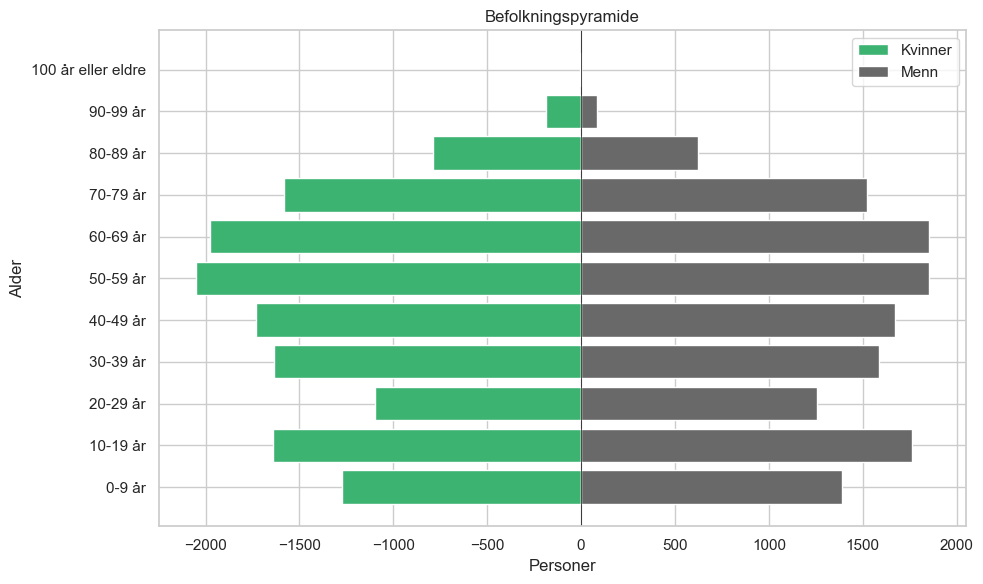

Totalt antall personer: 27569


In [246]:
# Finner startalderen per gruppe og konverterer til integer for senere regning
dfa['startalder'] = dfa['Alder'].str.extract(r'(\d+)').astype(int)

# Lager en ny kolonne for å gruppere med indeks som øker med annenhver linje. Dette slår to og to aldersspenn sammen slik at man får to fem årsperioder i samme gruppe
dfa['gruppe'] = dfa.index // 2


# Bruker pandas til å aggregere gruppene. Henter laveste startalder, og summerer tallene for kvinner og menn hver for seg. Resetter indexen til slutt
dfa = dfa.groupby('gruppe').agg({
    'startalder': 'min',
    'Kvinner': 'sum',
    'Menn': 'sum'
}).reset_index(drop=True)

# Lager ny aldersgruppeetikett i 10-års intervaller
dfa['Alder'] = dfa['startalder'].astype(str) + '-' + (dfa['startalder'] + 9).astype(str) + ' år'

# Sorterer slik at aldersgruppene går fra yngst nederst til eldst øverst
dfa = dfa.sort_values(by='startalder')

# Endrer navn på raden 100-109 år
dfa['Alder'] = dfa['Alder'].replace('100-109 år', '100 år eller eldre')

# Beholder kun originale kolonner og setter de i riktig rekkefølge
dfa = dfa[['Alder', 'Kvinner', 'Menn']]






# Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(dfa['Alder'], dfa['Kvinner'], color='mediumseagreen', label='Kvinner')
ax.barh(dfa['Alder'], dfa['Menn'], color='dimgray', label='Menn')

# Aksetilpasning
ax.set_xlabel('Personer')
ax.set_ylabel('Alder')
ax.set_title('Befolkningspyramide')
ax.legend(loc='upper right')

# Fjerner y-aksens nullpunkt
ax.axvline(0, color='black', linewidth=0.5)

# Rydd opp layout
plt.tight_layout()
plt.show()



# bruker pandas .abs for å gjøre de negative verdiene i "kvinner" kolonnen til positive. Summerer sammen.
totalt_antall = dfa['Kvinner'].abs().sum() + dfa['Menn'].sum()

print(f"Totalt antall personer: {totalt_antall}")

## Oppgave 2

C:\Users\sigur\AppData\Local\Temp\ipykernel_25364\4024841675.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(dfb_sorted['Land'], rotation=45, ha='right')


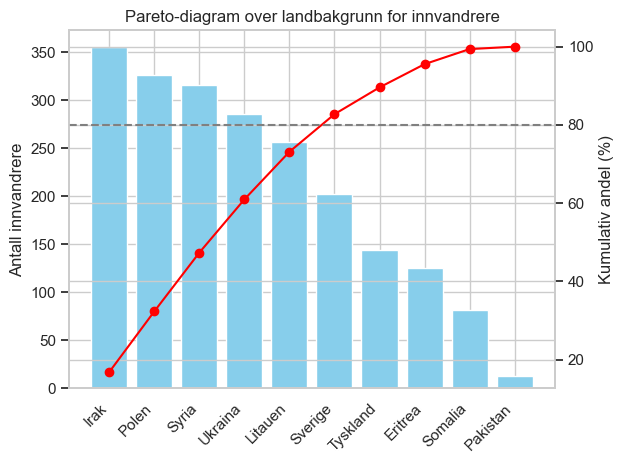

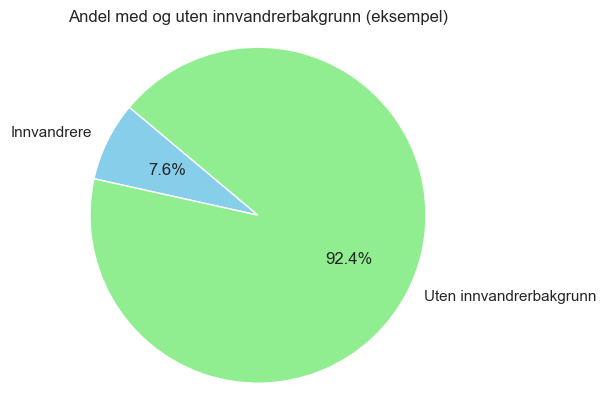

In [ ]:
# Endrer navnet på en kolonne
dfb = dfb.rename(columns={"2025": "Antall"})

# Sortering for Pareto
dfb_sorted = dfb.sort_values(by='Antall', ascending=False)
dfb_sorted['Kumulativ andel (%)'] = dfb_sorted['Antall'].cumsum() / dfb_sorted['Antall'].sum() * 100

# Pareto-diagram
fig, ax1 = plt.subplots()
ax1.bar(dfb_sorted['Land'], dfb_sorted['Antall'], color='skyblue')
ax1.set_ylabel('Antall innvandrere')
ax1.set_title('Pareto-diagram over landbakgrunn for innvandrere')
ax1.set_xticklabels(dfb_sorted['Land'], rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(dfb_sorted['Land'], dfb_sorted['Kumulativ andel (%)'], color='red', marker='o')
ax2.set_ylabel('Kumulativ andel (%)')
ax2.axhline(80, color='gray', linestyle='dashed')


plt.tight_layout()
plt.show()





# Kakediagram
total = 27569
innvandrere = dfb['Antall'].sum()
uten_innvandrerbakgrunn = total - innvandrere

labels = ['Innvandrere', 'Uten innvandrerbakgrunn']
sizes = [innvandrere, uten_innvandrerbakgrunn]
colors = ['skyblue', 'lightgreen']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Andel med og uten innvandrerbakgrunn (eksempel)')
plt.axis('equal')
plt.show()


## Oppgave 3

Totalt antall personer i alderen 20–65 år: 14825
Totalt antall sysselsatte personer: 12172


C:\Users\sigur\AppData\Local\Temp\ipykernel_25364\2776200890.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Kategori', y='Antall', data=dfa_s, palette='pastel')


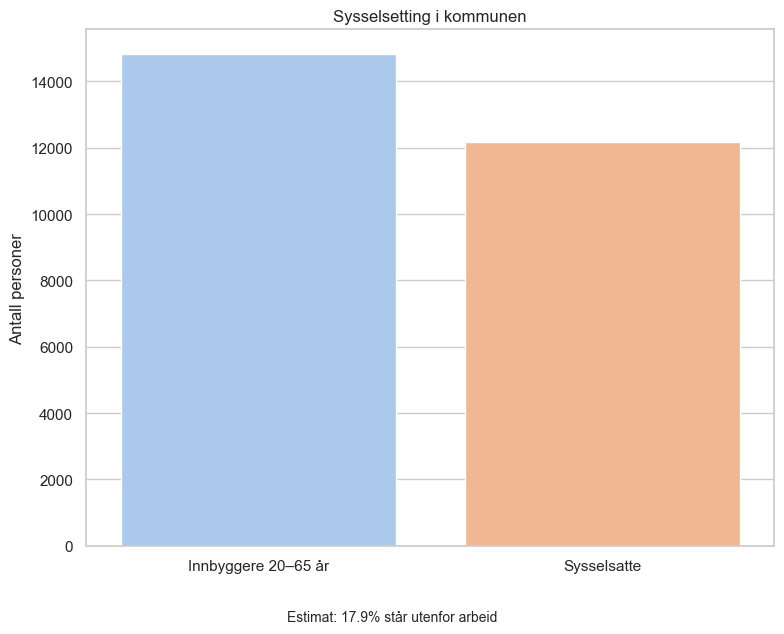

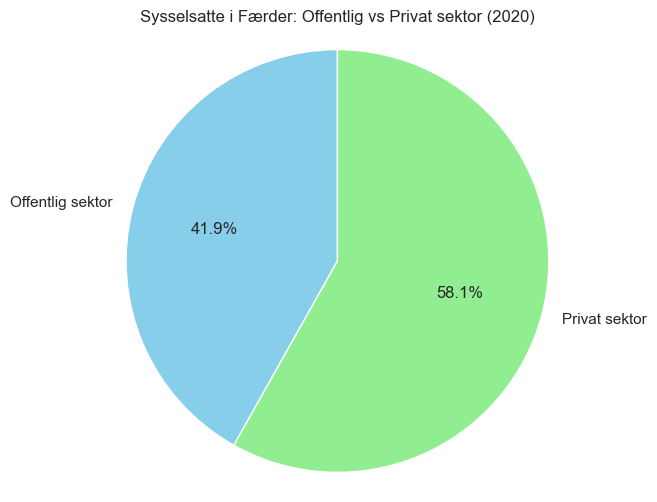

In [ ]:
# Leser inn dfa på nytt for å få det tilbake til sin opprinnelige tilstand
dfa = pd.read_csv(urla, sep=';')

# Endrer til positive verdier
dfa['Kvinner'] = dfa['Kvinner'].abs()

# Slår sammen antall kvinner og menn
dfa['Totalt'] = dfa['Kvinner'] + dfa['Menn']

# bruker indeks til å finne totalt antall personer mellom 20-65 år
sum_20_65 = dfa.loc[4:12, 'Totalt'].sum()
print(f"Totalt antall personer i alderen 20–65 år: {sum_20_65}")

# Bruker indeks til å finne totalt antall sysselsatte personer
sysselsatte = dfc.loc[0:6, '2020'].sum()
print(f"Totalt antall sysselsatte personer: {sysselsatte}")

# Laster inn seaborn
import seaborn as sns


# Lager et DataFrame for Seaborn
dfa_s = pd.DataFrame({
    'Kategori': ['Innbyggere 20–65 år', 'Sysselsatte'],
    'Antall': [sum_20_65, sysselsatte]
})

# Beregner andel utenfor arbeid
utenfor_arbeid = sum_20_65 - sysselsatte
andel_utenfor = (utenfor_arbeid / sum_20_65) * 100

# Lager plott
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Kategori', y='Antall', data=dfa_s, palette='pastel')

plt.title("Sysselsetting i kommunen")
plt.ylabel("Antall personer")
plt.xlabel("")
plt.figtext(0.5, -0.05, f"Estimat: {andel_utenfor:.1f}% står utenfor arbeid", ha="center", fontsize=10)
plt.tight_layout()
plt.show()





# Del 2 kakediagram

offentlig_sektor = dfc.loc[[3, 4, 5], '2020'].sum()
privat_sektor = dfc.loc[[0, 1, 2, 6], '2020'].sum()


sektorer = ['Offentlig sektor', 'Privat sektor']
ansatte = [offentlig_sektor, privat_sektor]
farger_sektor = ['skyblue', 'lightgreen']

plt.figure(figsize=(6, 6))
plt.pie(ansatte, labels=sektorer, colors=farger_sektor, autopct='%1.1f%%', startangle=90)
plt.title("Sysselsatte i Færder: Offentlig vs Privat sektor (2020)")
plt.axis('equal')  # Sørger for rund sirkel
plt.show()



## Oppgave 4

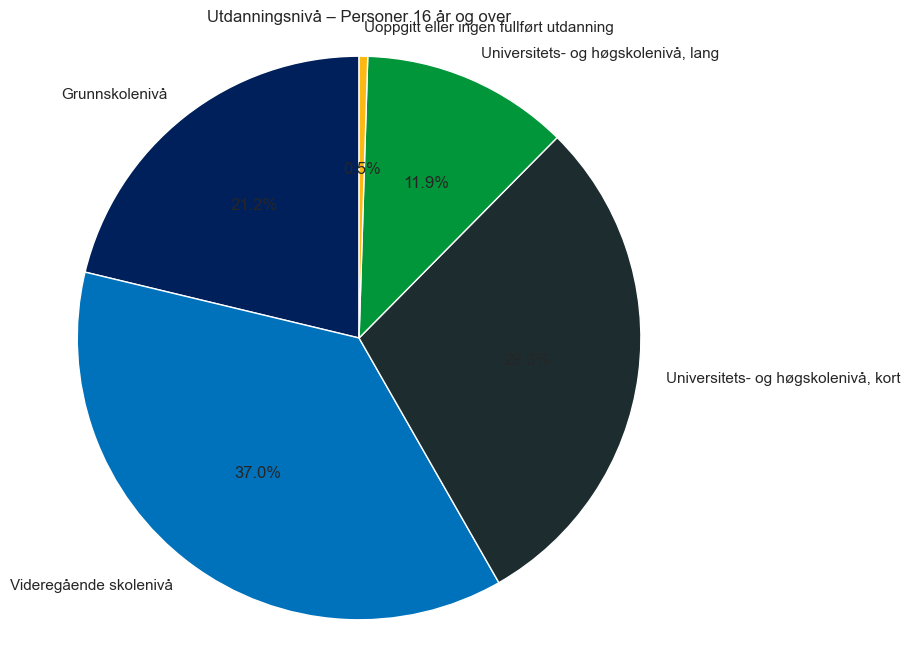

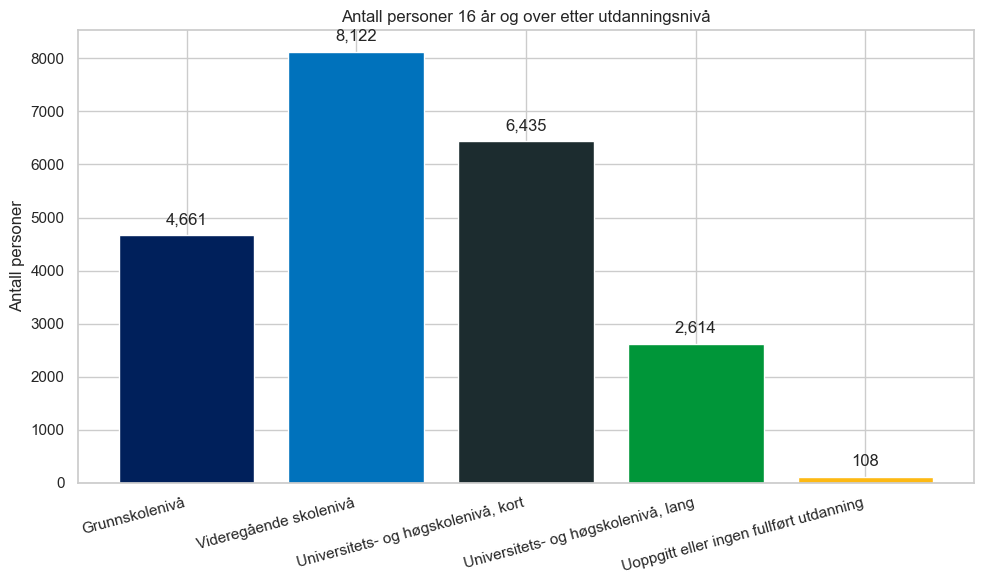

In [ ]:


# Bruker de samme fargene som SSB
farger = [
    
    '#00205B',  # mørk blå
    '#0072BC',  # blå
    '#1C2C2F',  # mørk grå
    '#009639',  # grønn
    '#FDB913'   # gul
]

# Lager kakediagram
plt.figure(figsize=(8, 8))
plt.pie(dfd['Personer 16 år og over'], 
        labels=dfd['Utdanningsnivå'], 
        colors=farger, 
        autopct='%1.1f%%', 
        startangle=90)
plt.title('Utdanningsnivå – Personer 16 år og over')
plt.axis('equal')  # For rund sirkel
plt.show()




# Lager stolpediagram
plt.figure(figsize=(10, 6))
bars = plt.bar(dfd['Utdanningsnivå'], dfd['Personer 16 år og over'], color=farger)

# Legger verdier over hver søyle
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 150, f'{yval:,}', ha='center', va='bottom')

plt.title('Antall personer 16 år og over etter utdanningsnivå')
plt.ylabel('Antall personer')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

## Oppgave 5

In [250]:
# Regner ut kulturbudjsettet ved å summere alle områdene som er oppgitt i kroner per innbygger og ganger det med antall innbyggere
kulturbudsjett = dfe['2024'].sum() * totalt_antall

print(f'Det totale kulturbudsjettet er: {kulturbudsjett}')


idrett_og_anlegg = dfe.loc[4, '2024'] * totalt_antall

idrett_og_anlegg_andel = idrett_og_anlegg * 100 / kulturbudsjett

# Printer ut resultatet med en desimal
print(round(idrett_og_anlegg_andel, 1))



Det totale kulturbudsjettet er: 38045220
26.2


## Oppgave 6

In [251]:
# Konverterer verdiene fra string til float for å kunne summere sammen
dff['2024'] = dff['2024'].astype(str).str.replace(",", ".").astype(float)

# Summerer sammen alle verdiene for å se hvor mange prosent som totalt er tatt med
total_2024 = dff['2024'].sum()

# Regner ut 100% - prosentandelen som er oppgitt i datagrunnlaget og runder av til 1 desimal. Printer resultatet. 
print(f'Prosentandel av kommunens avgifter som ikke er inkludert i datagrunnlaget: {round(100 - total_2024, 1)}')

Prosentandel av kommunens avgifter som ikke er inkludert i datagrunnlaget: 10.7


## Oppgave 7 

In [252]:
# Finner totalt antall biler
total_biler = dfg['2024'].sum()
# Regner ut prosentandelen hybridbiler
hybrid = round(dfg.loc[3, '2024'] / total_biler * 100, 1) 

# Printer resultatet
print(f'Omtrentlig andel hybridbiler i kommunen: {hybrid} prosent')

# Brukers indeks til å regne ut totalt antall personer i kjørbar alder
kjørbar_alder = dfa.loc[4:15, 'Totalt'].sum()


# Printer ut resultatet av antall biler delt på antall personer i kjørbar alder, rundes av til 2 desimaler
print(f'Antall biler per person i "kjørbar alder": {round(total_biler / kjørbar_alder, 2)}')

Omtrentlig andel hybridbiler i kommunen: 13.9 prosent
Antall biler per person i "kjørbar alder": 0.74


## Oppgave 8 

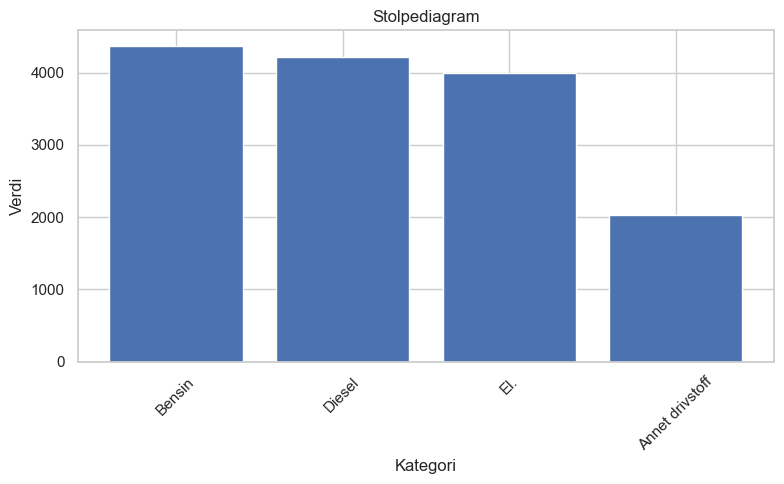

In [258]:
import matplotlib.pyplot as plt

# Funksjon som generer stolpediagram fra et datasett med to kolonner
def stolpediagram(data):
  
    kategorier = data.iloc[:, 0]
    verdier = data.iloc[:, 1]

    plt.figure(figsize=(8, 5))
    plt.bar(kategorier, verdier)
    plt.xlabel('Kategori')
    plt.ylabel('Verdi')
    plt.title('Stolpediagram')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



stolpediagram(dfg)


## Oppgave 9 

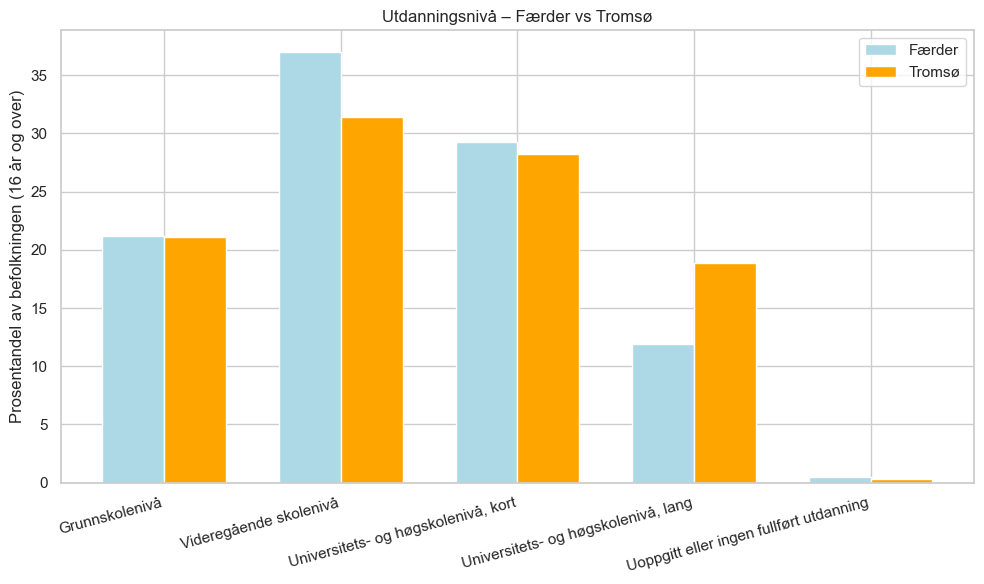

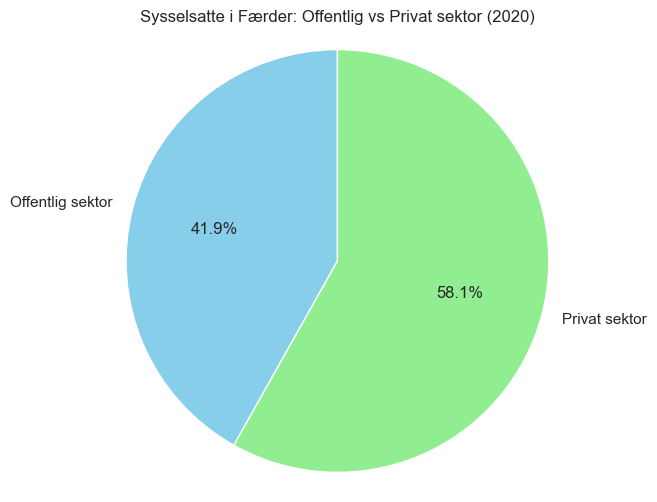

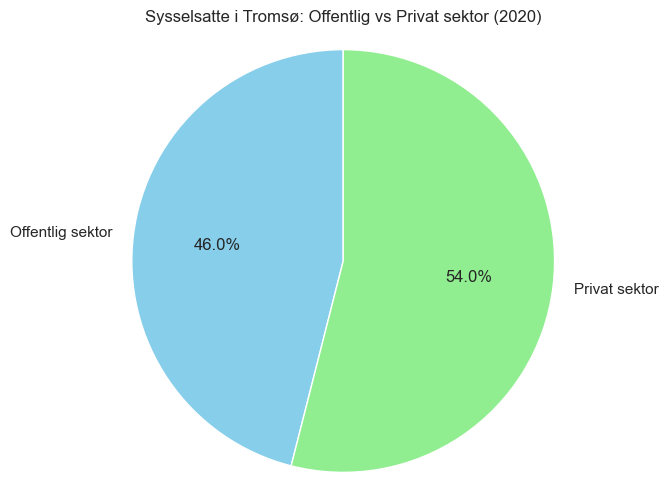

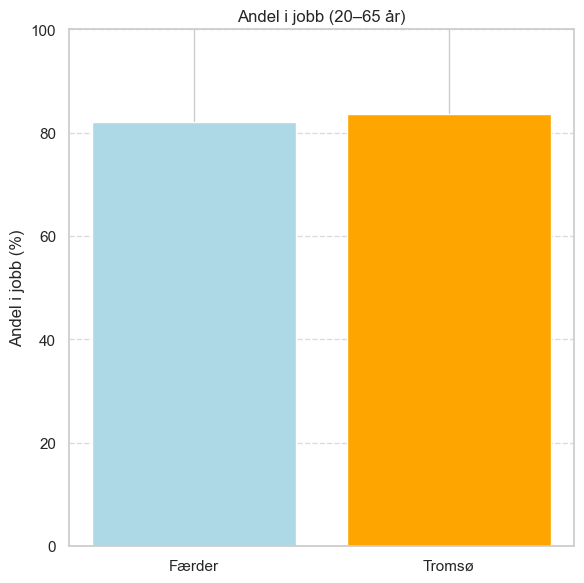

In [254]:
import numpy as np


# Regner ut total antall personer i kommunene over 16 år
dfd_total = dfd.loc[0:4, 'Personer 16 år og over'].sum()
dftu_total = dftu.loc[0:4, 'Personer 16 år og over'].sum()

# Regnet ut prosentandelen av de forskjellige utdanningsnivåene
dfd['Prosent'] = round(dfd['Personer 16 år og over'] / dfd_total * 100, 1)
dftu['Prosent'] = round(dftu['Personer 16 år og over'] / dftu_total * 100, 1)


nivaa = dfd['Utdanningsnivå']
x = np.arange(len(nivaa))  # plassering på x-aksen

# Bredde på søylene
width = 0.35

plt.figure(figsize=(10, 6))

# Søyler
bars1 = plt.bar(x - width/2, dfd['Prosent'], width, label='Færder', color= 'lightblue')
bars2 = plt.bar(x + width/2, dftu['Prosent'], width, label='Tromsø', color= 'orange')



# Oppsett
plt.title('Utdanningsnivå – Færder vs Tromsø')
plt.ylabel('Prosentandel av befolkningen (16 år og over)')
plt.xticks(x, nivaa, rotation=15, ha='right')
plt.legend()
plt.tight_layout()
plt.show()










plt.figure(figsize=(6, 6))
plt.pie(ansatte, labels=sektorer, colors=farger_sektor, autopct='%1.1f%%', startangle=90)
plt.title("Sysselsatte i Færder: Offentlig vs Privat sektor (2020)")
plt.axis('equal')  # Sørger for rund sirkel
plt.show()


offentlig_sektor_tromso = dftj.loc[[3, 4, 5], '2020'].sum()
privat_sektor_tromso = dftj.loc[[0, 1, 2, 6], '2020'].sum()

sektorer_tromso = ['Offentlig sektor', 'Privat sektor']
ansatte_tromso = [offentlig_sektor_tromso, privat_sektor_tromso]

plt.figure(figsize=(6, 6))
plt.pie(ansatte_tromso, labels=sektorer, colors=farger_sektor, autopct='%1.1f%%', startangle=90)
plt.title("Sysselsatte i Tromsø: Offentlig vs Privat sektor (2020)")
plt.axis('equal')  # Sørger for rund sirkel
plt.show()











dfta['Kvinner'] = dfta['Kvinner'].abs()
dfta['Totalt'] = dfta['Kvinner'] + dfta['Menn']

sysselsatte_tromso = dftj.loc[0:6, '2020'].sum()
sum_20_65_tromso = dfta.loc[4:12, 'Totalt'].sum()


andel_i_jobb_faerder = sysselsatte/sum_20_65 * 100
andel_i_jobb_tromso = sysselsatte_tromso/sum_20_65_tromso * 100



# Data for diagram
kommuner = ['Færder', 'Tromsø']
andeler = [andel_i_jobb_faerder, andel_i_jobb_tromso]

# Lag stolpediagram
plt.figure(figsize=(6, 6))
plt.bar(kommuner, andeler, color=['lightblue', 'orange'])
plt.ylabel('Andel i jobb (%)')
plt.title('Andel i jobb (20–65 år)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


